# Иследование копьютерных игр

**Описание проекта:**

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных:**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**План по выполнению проекта:**

Шаг 1. Открыть файл с данными и изучите общую информацию

Шаг 2. Подготовить данные
* Заменить названия столбцов (приведите к нижнему регистру);
* Преобразовать данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработать пропуски при необходимости:
* Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
* Описать причины, которые могли привести к пропускам;
* Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
* Посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.

Шаг 3. Провести исследовательский анализ данных
* Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотреть, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывать в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
* Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
* Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
* Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.
* Соотнести выводы с продажами игр на других платформах.
* Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составить портрет пользователя каждого региона
* Определить для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Описать различия в долях продаж.
* Самые популярные жанры (топ-5). Пояснить разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверить гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* Задать самостоятельно пороговое значение alpha.
* Пояснить:
    Как сформулировали нулевую и альтернативную гипотезы;
    Какой критерий применили для проверки гипотез и почему.

Шаг 6. Написать общий вывод


## Шаг 1. Открыть файл с данными и изучить общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/games.csv')
#выведим наш датасет
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
#Псмотрим информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Посмотрим на столбцы
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
#Посчитаем количество пустых значений
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
#Посчитаем количество дубликатов
df.duplicated().sum()

0

In [7]:
#Посмотрим на пустые значения в столбце Year_of_Release
df[df['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
df[df['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
df[df['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
df[df['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
#Посмотрим какие платформы
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [12]:
#Посмотрим какие жанры имеются
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

**Вывод:**

* Необходимо привести к правильному типу столбец : Year of Release
* Нужно привести к нижнему регистру столбцы нашей таблицы, а так же сами названия колонок
* Имеются пустые значения в столбцах rating, user_score, critic_score. Мы можем заменить имеющиеся пустые значения в таблице: year of release на года от той же игры только другой платформы, в остальных случаях решим в процессе предобработки
* Дубликатов нет

## Шаг 2. Подготовка данных

* Заменим названия столбцов (приведем к нижнему регистру);
* Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
* Обработаем пропуски при необходимости:
* Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишем причины, которые могли привести к пропускам;
* Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберем это значение и опишем, как его обработать;
* Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

### Заменим названия столбцов

In [13]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [14]:
#Приведем к нижнему регистру следующие столбцы:
for column in df[['name', 'platform', 'genre', 'rating']]:
    df[column] = df[column].str.lower()
df.head()    

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразовать данные в нужные типы

In [15]:
#Изменим тип данных в столбце year_of_release
df['year_of_release'] = df['year_of_release'].astype('Int64')
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1463,max payne 2: the fall of max payne,ps2,2003,shooter,0.65,0.51,0.00,0.17,73.0,8.2,m
518,assassin's creed: brotherhood,ps3,2010,action,1.87,0.55,0.11,0.29,90.0,8.2,m
4618,story of seasons,3ds,2014,simulation,0.00,0.14,0.27,0.01,76.0,8.2,e10+
4628,nba 2k13,wii,2012,sports,0.36,0.03,0.00,0.03,NaN,7.5,e
14427,jig-a-pix: wild world,ds,2009,puzzle,0.03,0.00,0.00,0.00,NaN,tbd,e
2815,lego dimensions,ps4,2015,action,0.24,0.37,0.00,0.12,80.0,7.1,e10+
271,fifa 14,x360,2013,sports,0.92,2.89,0.01,0.40,84.0,4.2,e
4138,alice in wonderland,ds,2010,adventure,0.25,0.17,0.00,0.04,78.0,tbd,e10+
5139,shin megami tensei ii,snes,1994,role-playing,0.00,0.00,0.37,0.00,NaN,NaN,NaN
6947,prince of persia: the forgotten sands,wii,2010,action,0.10,0.11,0.00,0.02,77.0,8.1,t


### Обработка пропусков

In [16]:
df['year_of_release'].isna().sum()

269

In [17]:
#Напишем цикл где будем делать замену на года тех у кого совпадает название с игрой,
#но в графе year_of_release пусто
for i in df[df['year_of_release'].isna() == True].index:
    df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()
    
#Проверим результат
df['year_of_release'].isna().sum()

146

Заполнять попуски в critic_score, user_score и rating будет некорректно, тк в этом случае заполнение исказит результаты кореляционного анализа.

### Аббревиатуру tbd в столбцах с рейтингом.

Аббревиатура **tbd** значит **to be defined**. То есть, данные были нарочно не заполнены, так как не определились с рейтингом. Поэтому можно заменить tbd на Nan

In [18]:
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)

#Поменяем формат столбца user_score на float
df['user_score'] = df['user_score'].astype(float)

#Проверим результат
df['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [19]:
#Создадим новый столбец total_sales и прибавим продажи всех столбцов
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## Шаг 3. Исследовательский анализ данных

* Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос: за какой характерный срок появляются новые и исчезают старые платформы?
* Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.
* Рассмотрим, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.
* Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
* Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
* Соотнесем выводы с продажами игр на других платформах.
* Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Посмотрим, сколько игр выходило в разные года.

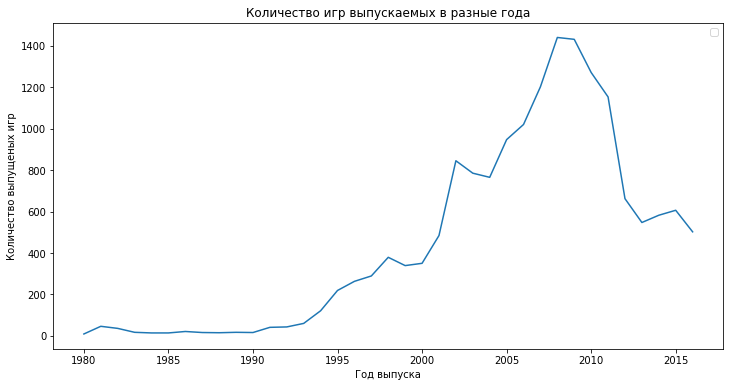

In [20]:
#Построим график, чтобы посмотреть как менялось количество выпускаемых игр
games_of_period = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=games_of_period)
plt.title('Количество игр выпускаемых в разные года')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущеных игр')
plt.legend('')

**Вывод:**

Количество копьютерных игр резко начало расти с большой скоростью с 1993 по 2008 год. После 2008 года виден резкий спад, так как в эти года началось массовое производство мобильных игр.

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос: за какой характерный срок появляются новые и исчезают старые платформы?

Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.

Выберем несколько потенциально прибыльных платформ.

Text(0, 0.5, 'Количество продаж')

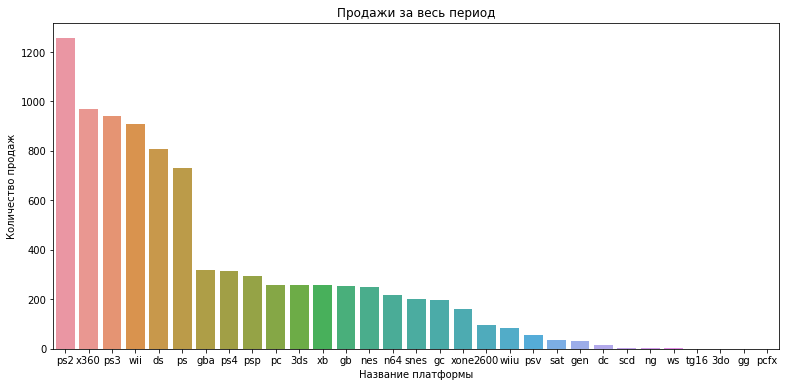

In [21]:
platform_on_sales = df.pivot_table(index='platform', values='total_sales', 
                                   aggfunc='sum').sort_values(by='total_sales', 
                                                              ascending=False)
plt.figure(figsize=(13, 6))
sns.barplot(x=platform_on_sales.index, y=platform_on_sales['total_sales'])
plt.title('Продажи за весь период')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')

**Вывод:**

Самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS

In [22]:
# Напишем функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 20011 года
def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] > 2011)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', 
                               aggfunc='sum').sort_values('year_of_release', 
                                                          ascending=False)
    return total

### Рассмотрим, какие платформы лидируют по продажам, растут или падают. 

<AxesSubplot:xlabel='year_of_release'>

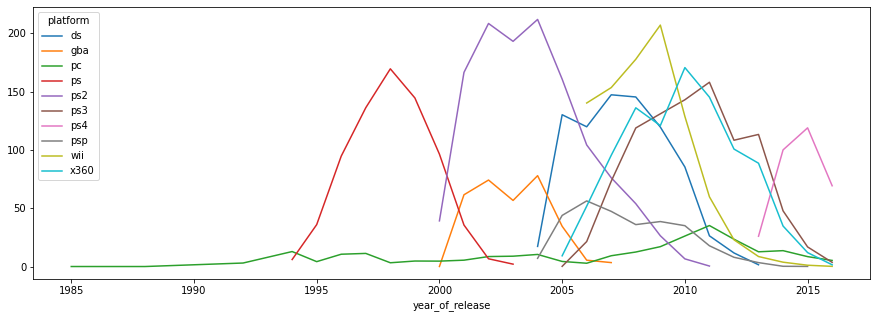

In [23]:
top_10 = df.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales').tail(10).index

df.query('platform in @top_10').pivot_table(index='year_of_release', columns='platform', 
                                               values='total_sales', aggfunc='sum').plot(figsize = (15, 5))


По графику видно, что много платформ потеряли свою актуальность. Чтобы иметь более точное представление об актуальных и лидирующих платформах, возьмём промежеток времени за пять лет, с 2011 по 2016 гг.  

In [24]:
df_actual = df[(df['year_of_release'] >= 2011)]
top_platforms = df_actual.pivot_table(index='platform', 
                                  values='total_sales', 
                                  aggfunc='sum').sort_values(by='total_sales', 
                                                             ascending=False).head(10)
                                                                        
top_platforms = top_platforms.reset_index().rename_axis(None, axis=1)
top_platforms

,platform,total_sales
0,ps3,447.69
1,x360,382.75
2,ps4,314.14
3,3ds,258.21
4,xone,159.32
5,pc,98.67
6,wii,96.39
7,wiiu,82.19
8,psv,53.81
9,ds,39.54


<AxesSubplot:xlabel='year_of_release'>

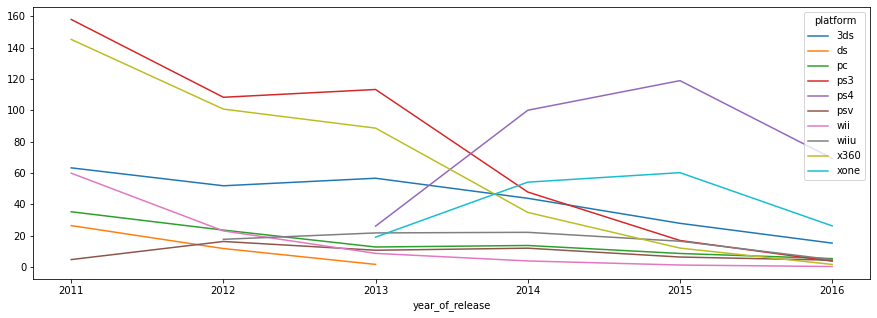

In [25]:
top_10 = df_actual.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales').tail(10).index

df_actual.query('platform in @top_10').pivot_table(index='year_of_release', columns='platform', 
                                               values='total_sales', 
                                                   aggfunc='sum').plot(figsize = (15, 5))

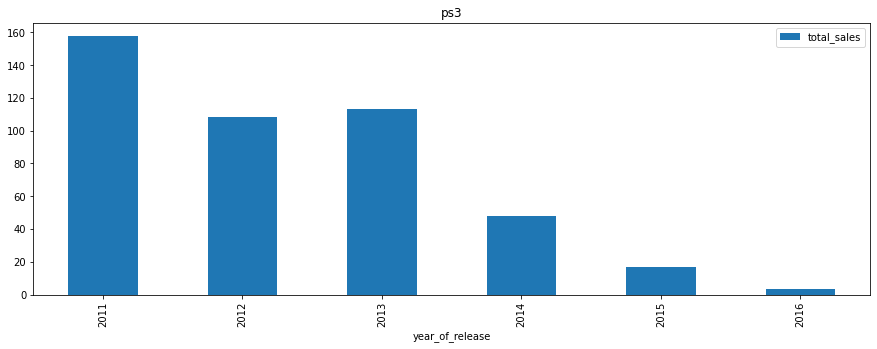

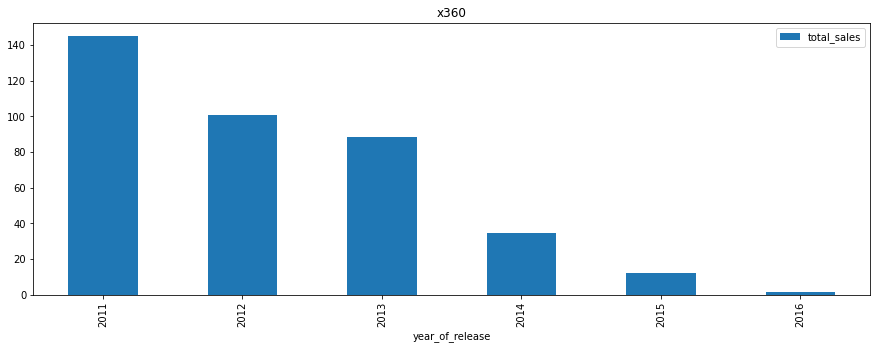

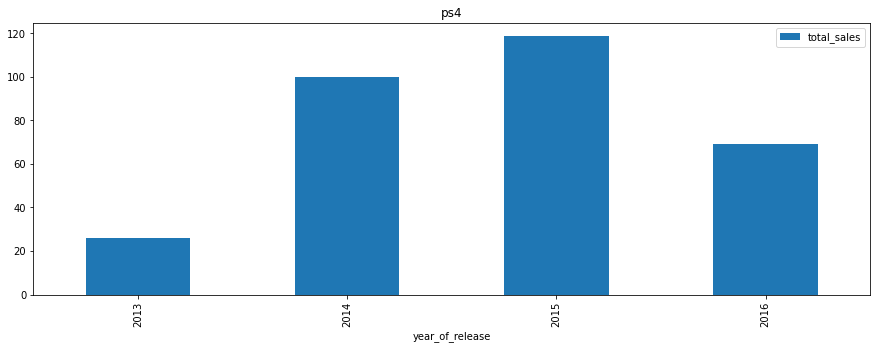

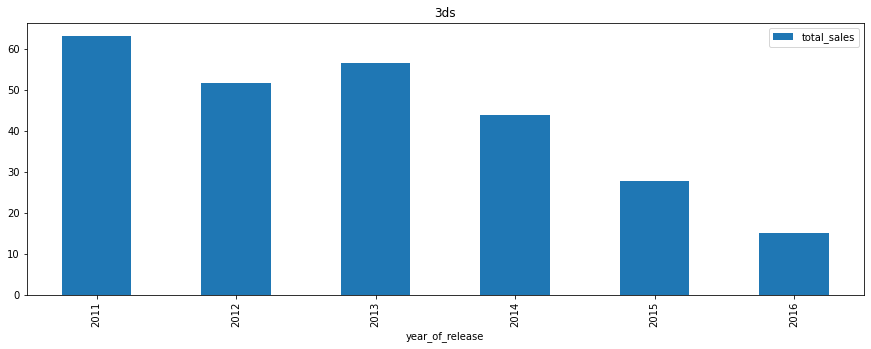

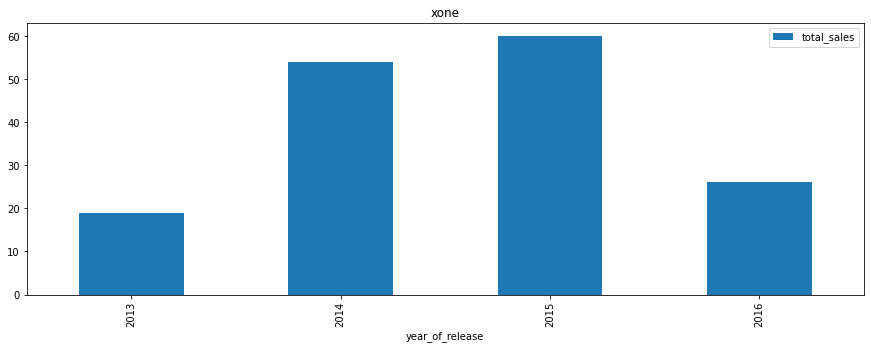

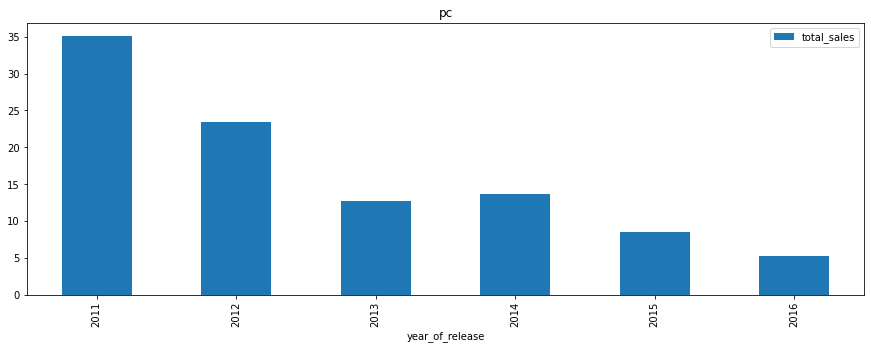

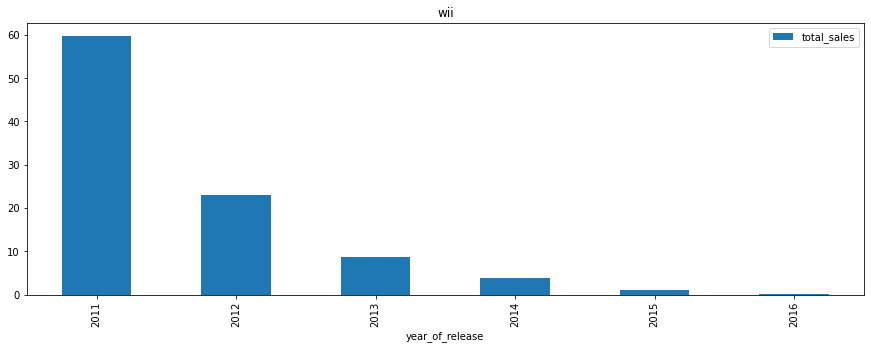

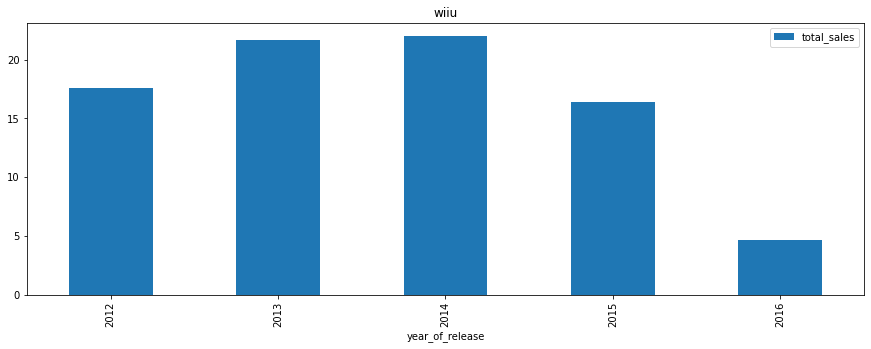

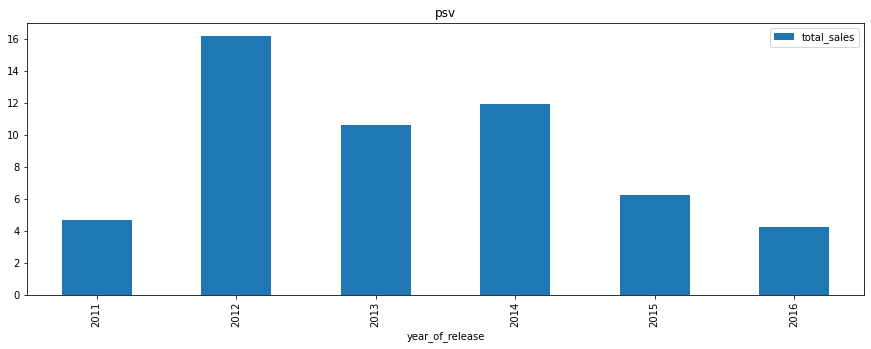

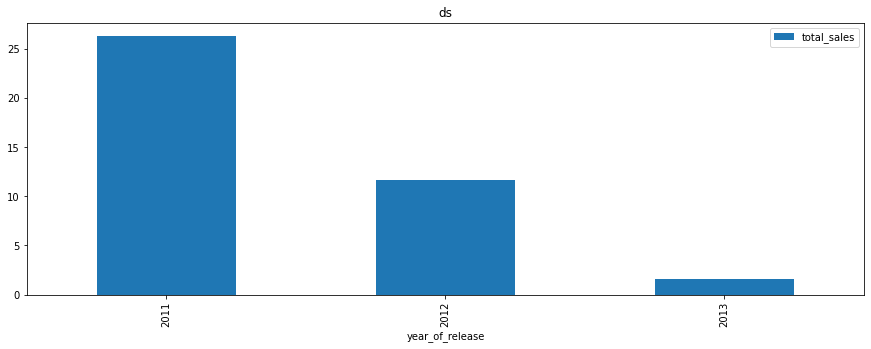

In [26]:
#Построим график динамики продаж по всем актуальным платформам
platform_grouped = df_actual.pivot_table(index='platform', values='total_sales', 
                                  aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
platform_grouped = platform_grouped.head(10).reset_index()

top_platforms_dict = platform_grouped['platform'].unique()

for platform in top_platforms_dict:
    df_actual[df_actual['platform'] == platform].pivot_table(index='year_of_release', 
                                               values='total_sales', 
                                               aggfunc='sum').plot(kind='bar', 
                                                                   figsize=(15,5))
    plt.title(platform)

Рассмотрим средную продолжительность существования платформ

In [27]:
platform_life = (df.loc[:,['year_of_release', 'platform']]
        .drop_duplicates()
        .pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
       )
platform_life

platform_life.year_of_release.describe() 

count    31.000000
mean      7.806452
std       5.114811
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

**Вывод:**

* В 2016 году лучше всего продаются  Pc, Xbox ONE и Sony Play Station 4, скорее всего именно эти платформы будут актуальны в 2017 году. 
* у Ps3 и Xbox360 в 2013 году резко падают продажи, это может быть связанно с датой выхода консолей нового покаления.
* Средняя продолжительность существования платформ составляет около 8 лет.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

Text(0.5, 1.0, 'Продажи с 2011 года')

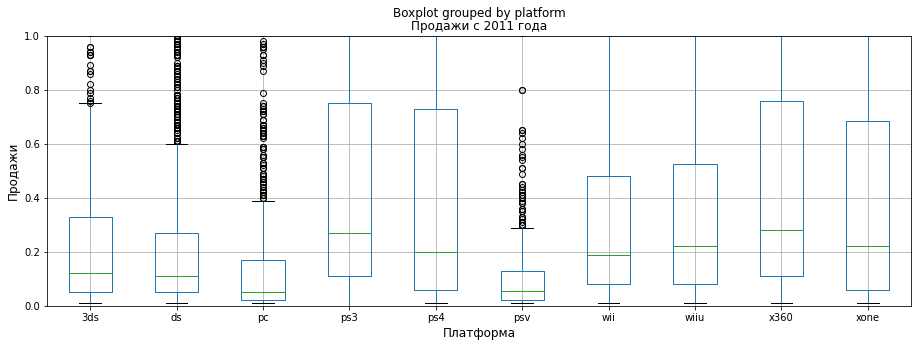

In [28]:
df.query('platform in @top_10').boxplot(column = 'total_sales', by = 'platform', 
                                               figsize = (15, 5))
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.ylim(0, 1)
plt.title('Продажи с 2011 года')

**Вывод:**

Судя по графику самые популярные платформы это Ps3, Ps4, Xbox 360 и Xbox One. Исходя из графиков видно, что медиана протикает у всех платформ по разному. Разница, между платформами, формируется благодаря эксклюзивам выпускаемых только на определённой платформе, а также производительности и актуальности. 

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [29]:
#Корреляция между отзывами пользователей и продажам
ps3 = df[df['platform'] == 'ps3']
corr_ps3 = ps3['user_score'].corr(ps3['total_sales'])
print('Корреляции между продажей игр для Ps3 и оценками критиков:', corr_ps3)

Корреляции между продажей игр для Ps3 и оценками критиков: 0.12669133936341712


In [30]:
#Корреляция между отзывами критиков и продажам
corr_critic_ps3 = ps3['critic_score'].corr(ps3['total_sales'])
print('Корреляции между продажей игр для Ps3 и оценками критиков:', corr_critic_ps3)

Корреляции между продажей игр для Ps3 и оценками критиков: 0.4324315685642061


Text(0.5, 1.0, 'Sony Play Station 3')

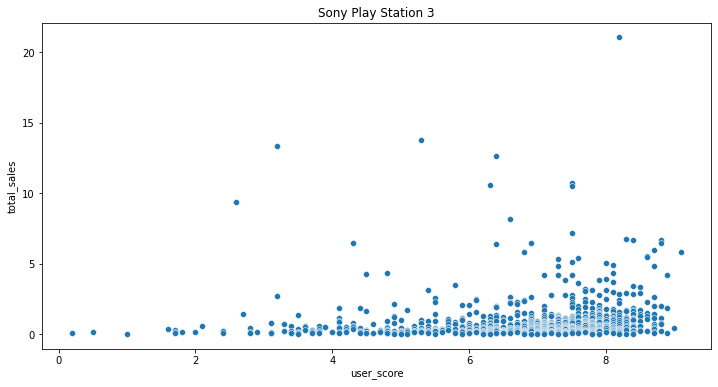

In [31]:
#Построим диаграмму рассеяния по оценкам пользователей
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps3)
plt.title('Sony Play Station 3')

Text(0.5, 1.0, 'Sony Play Station 3')

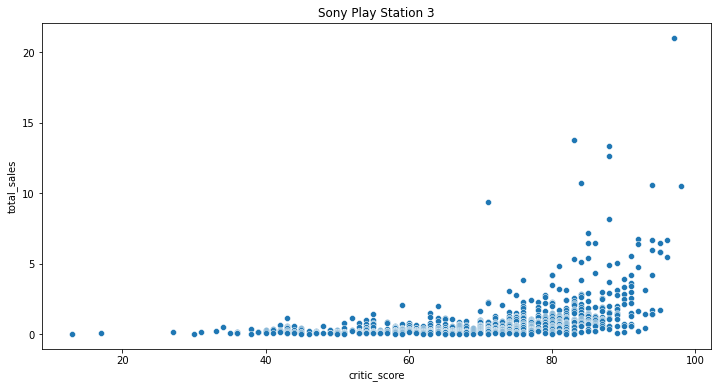

In [32]:
#Построим диаграмму рассеяния по оценкам критиков 
plt.figure(figsize=(12, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps3)
plt.title('Sony Play Station 3')

**Вывод:**

Игроки больше прислушиваются к оценкам критиков, а не пользвателей. По этому корреляция между оцеками пользователей - слабая, а между оценками критиков - умеренная. Так же это видно по графику рассеивания, чем выше оценки у критиков тем больше продаж.

### Соотнесем выводы с продажами игр на других платформах.

In [33]:
#Создадим функцию для вывода диограмм каждой платформы
def other_platform(df_platform, name):
    df_platform = df.query('platform == @name')
    
    
    # диаграммы рассеяния для анализа зависимостей продаж игр для платформы от оценок пользователей и критикиов
    fig, (ax1, ax2) = plt.subplots(
        nrows=1, ncols=2,
        figsize=(12, 6)
    )
    ax1.scatter(x=df_platform['critic_score'], y=df_platform['total_sales'], alpha=0.3)
    ax1.set_title('Диограмма рассеивания')
    ax1.set_xlabel('Оценки критиков')
    ax1.set_ylabel('Проданные копии, млн. шт.')
    ax2.scatter(x=df_platform['user_score'], y=df_platform['total_sales'], alpha=0.3)
    ax2.set_title('Анализ влияния оценки пользователей на продажи')
    ax2.set_xlabel('Оценки пользователей')
    ax2.set_ylabel('Проданные копии, млн. шт.')
    plt.show()
 
    print("Корреляции между продажей игр и оценками критиков:",
               df_platform['critic_score'].corr(df_platform['total_sales']))
    print("Корреляции между продажей игр и оценками пользователей:",
               df_platform['user_score'].corr(df_platform['total_sales']))

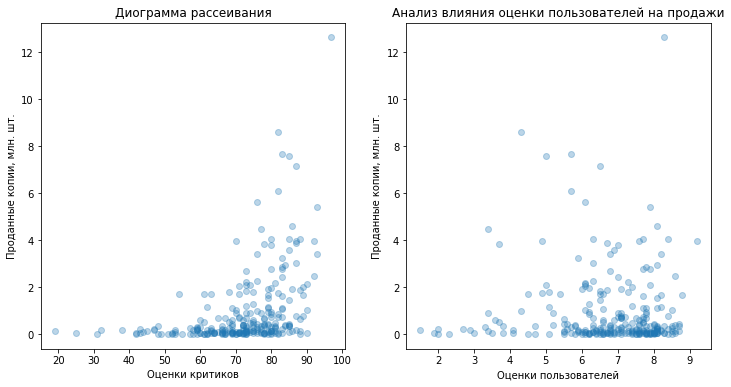

Корреляции между продажей игр и оценками критиков: 0.40656790206178095
Корреляции между продажей игр и оценками пользователей: -0.031957110204556424


In [34]:
other_platform(df_actual, 'ps4')

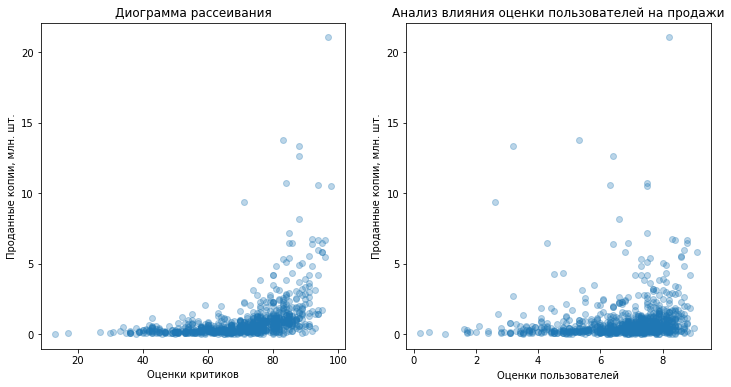

Корреляции между продажей игр и оценками критиков: 0.4324315685642061
Корреляции между продажей игр и оценками пользователей: 0.12669133936341712


In [35]:
other_platform(df_actual, 'ps3')

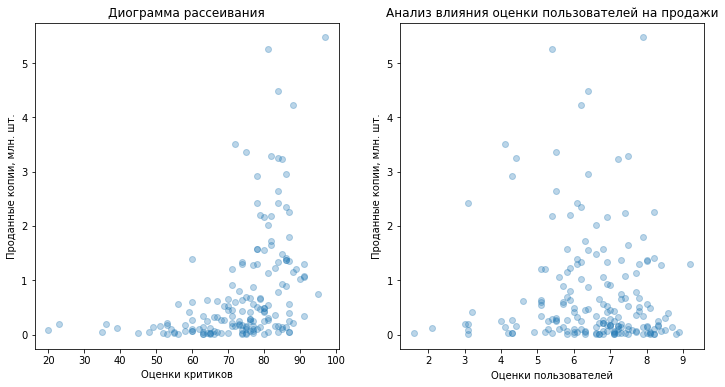

Корреляции между продажей игр и оценками критиков: 0.4169983280084017
Корреляции между продажей игр и оценками пользователей: -0.06892505328279414


In [36]:
other_platform(df_actual, 'xone')

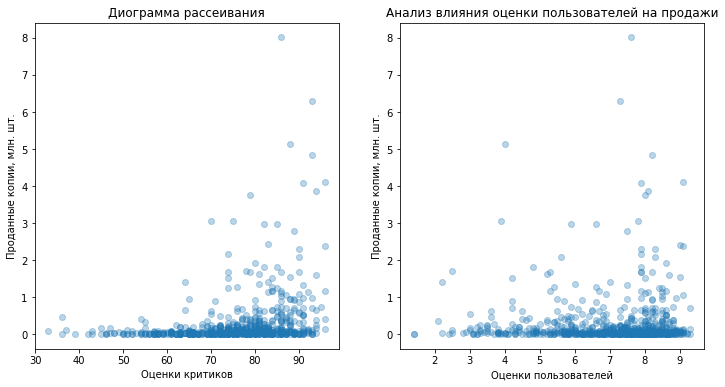

Корреляции между продажей игр и оценками критиков: 0.2568867378948215
Корреляции между продажей игр и оценками пользователей: 0.010475684621486417


In [37]:
other_platform(df_actual, 'pc')

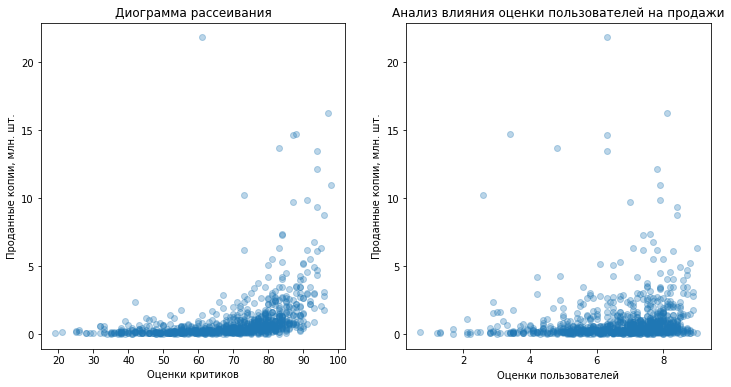

Корреляции между продажей игр и оценками критиков: 0.3937358653072588
Корреляции между продажей игр и оценками пользователей: 0.11445882978454185


In [38]:
other_platform(df_actual, 'x360')

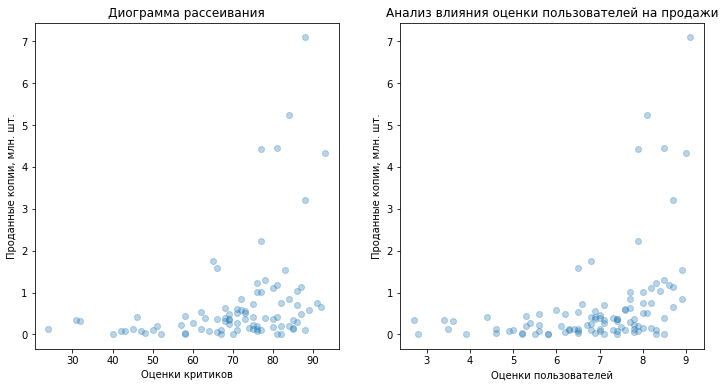

Корреляции между продажей игр и оценками критиков: 0.34837976012017485
Корреляции между продажей игр и оценками пользователей: 0.4002190202148617


In [39]:
other_platform(df_actual, 'wiiu')

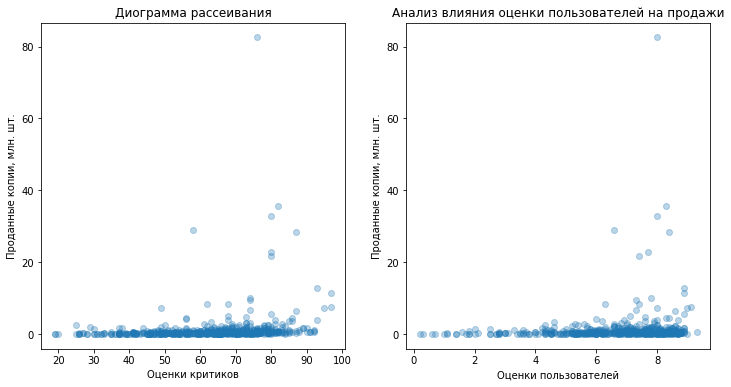

Корреляции между продажей игр и оценками критиков: 0.17755988806089948
Корреляции между продажей игр и оценками пользователей: 0.11241436067003169


In [40]:
other_platform(df_actual, 'wii')

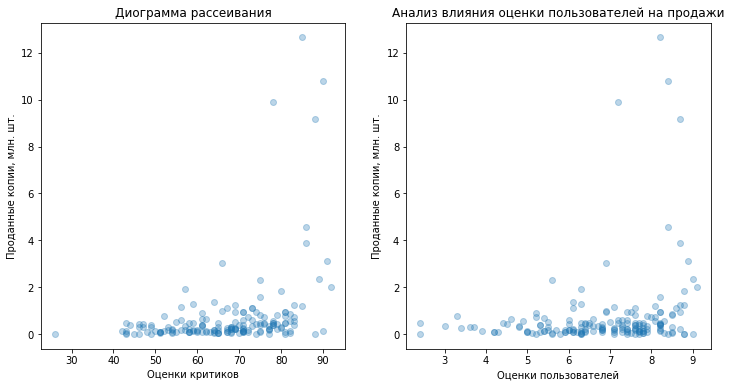

Корреляции между продажей игр и оценками критиков: 0.3494009303924131
Корреляции между продажей игр и оценками пользователей: 0.22480798039571082


In [41]:
other_platform(df_actual, '3ds')

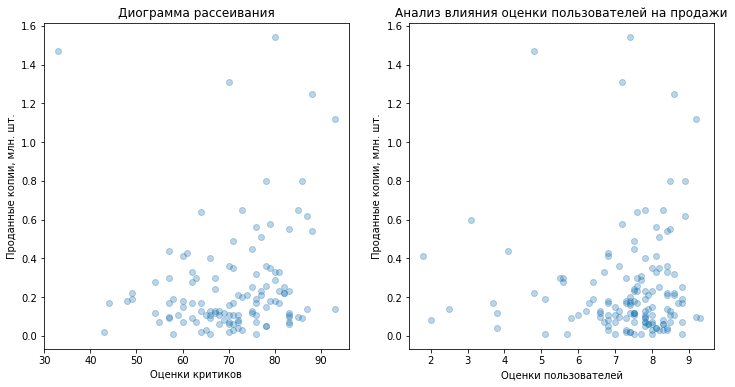

Корреляции между продажей игр и оценками критиков: 0.1315167215429264
Корреляции между продажей игр и оценками пользователей: 0.013579522883028902


In [42]:
other_platform(df_actual, 'psv')

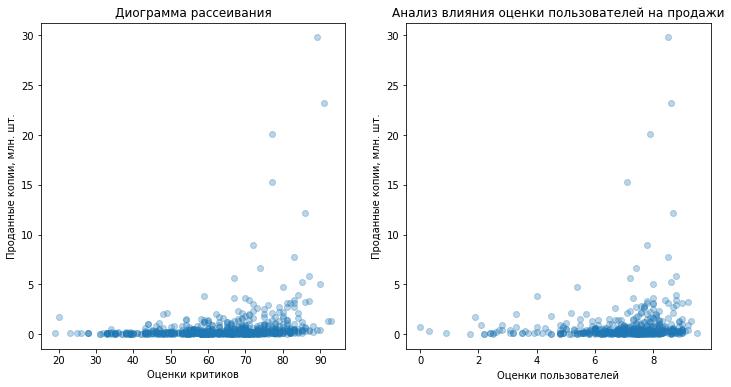

Корреляции между продажей игр и оценками критиков: 0.23637945738859747
Корреляции между продажей игр и оценками пользователей: 0.1304355011164249


In [43]:
other_platform(df_actual, 'ds')

**Вывод:**

Практически у всех платформ присутствуем корреляция, между оценками пользователей и критиков к продажам.
Оценка пользователей слабо влияет на продажи, чего не скажешь о оценке критиков. Покупатели прислушиваются больше к критикам чем к оценкам других пользователей

### Посмотрим на общее распределение игр по жанрам.

In [44]:
# Методом сводных таблиц выведем жанры и их продажи.  отсортируем по убыванию. 
distr_genre = df.pivot_table(index='genre', values='total_sales', 
                             aggfunc='sum').sort_values(by='total_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
display(distr_genre)

,genre,total_sales
0,action,1744.17
1,sports,1331.27
2,shooter,1052.45
3,role-playing,934.56
4,platform,827.77
5,misc,802.51
6,racing,728.67
7,fighting,447.53
8,simulation,389.97
9,puzzle,242.57


Text(0, 0.5, 'Продажи')

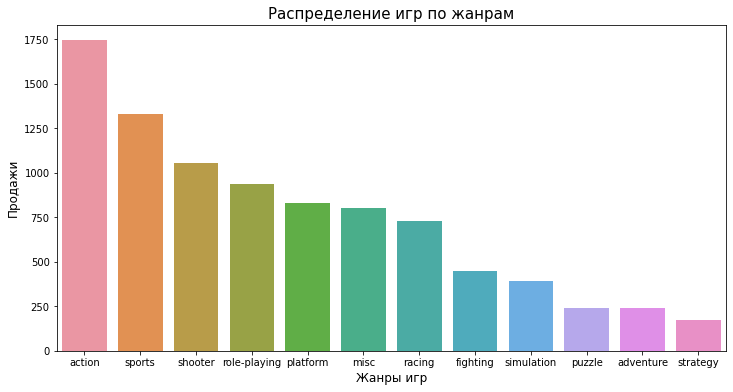

In [45]:
# Построим график жанров компьютерных игр
plt.figure(figsize=(12, 6))
plt.title('Распределение игр по жанрам', fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр', fontsize=12)
plt.ylabel('Продажи', fontsize=12)

**Вывод:**

Самые прибыльные жанры `Action`, `Sports`, так как у них много поклоников и игр в этих жанрах выходит каждый год гораздо боьше чем других жанров.

Хуже всего продаются стратегии.

## Шаг 4. Составим портрет пользователя каждого региона.

Рассмотрим информацию за 2016 год

In [46]:
#Функция для создания сводных таблиц за последний год
def for_pivot(row, title):
    temp = df[df['year_of_release'] == 2016]
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    for pivot, ax in zip(list(['platform', 'genre', 'rating']), axes.flatten()[:3]):
        ppivot = (temp.pivot_table(index=pivot, values=row, 
                                  aggfunc=('sum')).sort_values(by=row, 
                                                               ascending=False)
                  .reset_index().rename_axis(None, axis=1).head(5))
        print(ppivot)
        print('\n\n')
        sns.set_palette("Reds")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)

In [47]:
#Заменим пропуски в столбце rating на no_info чтобы огромная чать игр не выпала из анализа
df['rating'].fillna('no_info', inplace=True)
df['rating'].isna().sum()

0

In [48]:
#Проверим результат
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no_info,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no_info,31.38


### Портрет пользователя Северной Америки

  platform  na_sales
0      ps4     21.49
1     xone     14.27
2      3ds      4.14
3     wiiu      2.10
4       pc      1.36



          genre  na_sales
0       shooter     16.24
1        action      9.29
2        sports      7.54
3  role-playing      5.89
4      fighting      1.84



    rating  na_sales
0        m     15.67
1        t      8.95
2  no_info      8.53
3        e      7.97
4     e10+      3.81





None

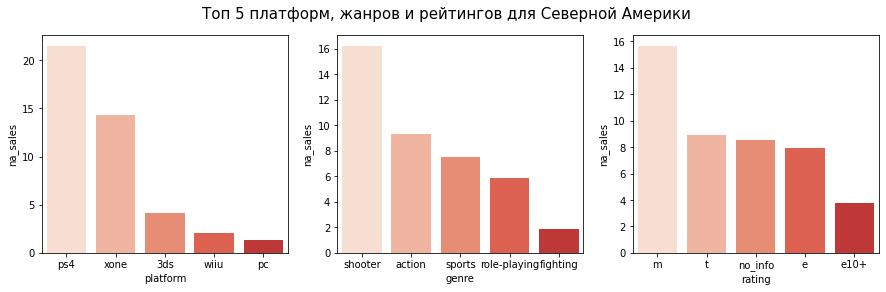

In [49]:
display(for_pivot('na_sales','Топ 5 платформ, жанров и рейтингов для Северной Америки'))

**Вывод:**

* Самые популярные игровые платформы в Северной Амереке это: Ps4, Xbox One, 3Ds, WiiU, Pc.
* Топ 5 жанров в Европе : Shooter, Action, Sports, Role_playing, Fighting.
* По рейтингам видно, что больше всего продаж у игр с рейтингом "M", на втором месте игры с рейтингом "T" и на третьем месте игры без рейтинга.

### Портрет пользователя Европейского Союза

  platform  eu_sales
0      ps4     31.78
1     xone      9.63
2       pc      3.53
3      3ds      2.33
4     wiiu      1.48



          genre  eu_sales
0       shooter     15.90
1        sports     12.01
2        action     10.68
3  role-playing      4.28
4        racing      1.77



    rating  eu_sales
0        m     16.54
1        e     13.61
2        t      9.79
3  no_info      7.47
4     e10+      3.81





None

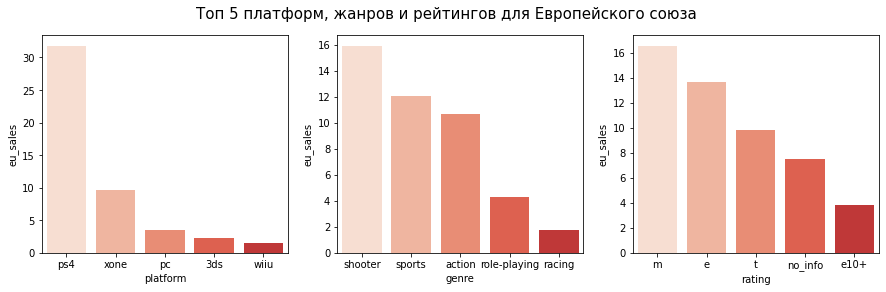

In [50]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период для Европейского союза
display(for_pivot('eu_sales','Топ 5 платформ, жанров и рейтингов для Европейского союза'))

**Вывод:**

* Самые популярные игровые платформы в Европе это: PS4, Xbox One, Pc, 3DS, WiiU.
* Топ 5 жанров в Европе : Shooter, Sports, Action, Role_playing, Racing
* По рейтингам видно, что больше всего продаж у игр с рейтингом "M", на втором месте игры с рейтингом "E" и на третьем месте игры с рейтингом "T"

### Портрет пользователя Японии

  platform  jp_sales
0      3ds      8.03
1      ps4      5.74
2      psv      3.56
3      ps3      1.30
4     wiiu      0.67



          genre  jp_sales
0        action      7.07
1  role-playing      6.61
2     adventure      1.18
3       shooter      1.06
4          misc      1.04



    rating  jp_sales
0  no_info     14.32
1        t      2.27
2        m      1.20
3        e      1.07
4     e10+      0.45





None

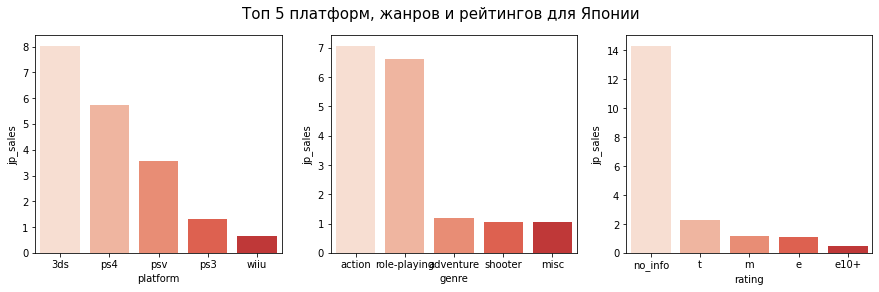

In [51]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период для Японии
display(for_pivot('jp_sales','Топ 5 платформ, жанров и рейтингов для Японии'))

**Вывод:**

* Самые популярные игровые платформы в Японии это: 3Ds, Ps4, Psv, 3DS, Ps3, Wiiu.
* Топ 5 жанров в Европе : Action, Role_playing, Adventure, Shooter, Misc.
* По рейтингам видно, что больше всего продаж у игр с рейтингом "T", на втором месте игры с рейтингом "M" и на третьем месте игры с рейтингом "E"

**Влияние рейтинга ESRB на продажи в отдельном регионе**

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр 

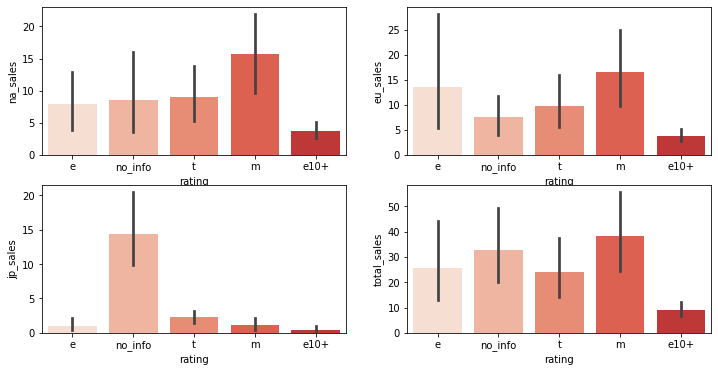

In [52]:
df_2016 = df[df['year_of_release'] == 2016]
fig, axis = plt.subplots(2,2, figsize=(12, 6))
sns.barplot(y='na_sales', x='rating', data = df_2016,estimator=sum, ax=axis[0,0]);
sns.barplot(y='eu_sales', x='rating', data = df_2016,estimator=sum, ax=axis[0,1]);
sns.barplot(y='jp_sales', x='rating', data = df_2016,estimator=sum, ax=axis[1,0]);
sns.barplot(y='total_sales', x='rating', data = df_2016,estimator=sum, ax=axis[1,1]);

**Вывод:**

ESRB влияеет на на продажи в Северной Амереке и странах Европейского Союза, но в Японии у них большого вляения нет.

**Вывод по составлению портрета пользователя каждого региона**


Игроки стран Европейского Союза и Северной Америки предпочитают жанр Shooter, что соответствует платформе PS4 и Xbox One, но Американские игроки предпочитают Action жанр - Sports, также у европейци предпочитают Rcing, а у жителей Америки Fighting. Портрет Японского игрока полностью отличается, так как на первом месте у них жанр Action, а основная платформа - 3DS. Рейтинг ESRB влияет на европейских и американских игроков, кроме региона - Япония, здесь сумарные продажи у игр без рейтинга выше.

## Шаг 5. Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую гипотезу:

    Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [53]:
# Сохраним в переменных xbox_hyp и pc_hyp соответствующие данные (актуальные данные за последние 10 лет)
xone_hyp = df_2016[(df_actual['platform']=='xone') & (df_2016['year_of_release'])]['user_score']
pc_hyp = df_2016[(df_actual['platform']=='pc') & (df_2016['year_of_release'])]['user_score']

#Посчитаем средний рейтинг пользователя для xbox платформ
xone_hyp.mean()

nan

In [54]:
#Посчитаем средний рейтинг пользователя для PC платформ
pc_hyp.mean()

nan

In [55]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = 0.01

results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


**Вывод:** 

   Не получилось отвергнуть нулевую гипотезу, значит средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевые гипотезы:

 * Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
 * Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

In [56]:
# Сохраним в переменных genre_action_hyp и genre_sports_hyp соответствующие данные с пользовательскими оценками
genre_action_hyp = df[(df['genre']=='action') & (df['year_of_release']>2006)]['user_score']
genre_sports_hyp = df[(df['genre']=='sports') & (df['year_of_release']>2006)]['user_score']

#выведем среднюю оценку по жанру экшн
genre_action_hyp.mean()

6.839204545454545

In [57]:
#выведем среднюю оценку по жанру спорт
genre_sports_hyp.mean()

6.3086294416243645

In [58]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = 0.01

results = st.ttest_ind(genre_action_hyp.dropna(), genre_sports_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.064098789244688e-11
Отвергаем нулевую гипотезу


**Вывод:**

Нулевая гипотеза была отвергнута, значит средние пользовательские рейтинги жанров Action и Sports различаются.

## Шаг 6. Общий вывод

**Общий вывод:**

* Перед анализом данных, мы подготовили наши данные, привели к правильным данным столбцы, привели к нижнему регистру таблицы и сами названия колонок и привели к правильным типам данных необходимые столбцы.
* Определили, что аббревиатура TBD значит to be determined, to be done. То есть данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа.
* Проведя анализ, мы выявили, что количество игр на игровые приставки и компьютеры начали расти с большой скоростью с 1993 до 2008 года. С 2008 года после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр.
* За весь период консольных приставок самые популярные оказались: PS2, X360, PS3, WII, DS, PS
* Также мы выявили, что средняя продолжительность жизни игровой приставки составляет порядка 10 лет. * Самый пик продаж наступает примерно через 5 лет после выпуска консоли
* Исходя из анализа мы увидели, что у Nintendo WII был резкий скачок в 2009 году и такой же резкий провал. Скорее всего потому что у людей не было особого интереса к приставке.
* Проведя анализ оценок пользователей и критиков, мы выявили, что оценки критиков и пользователей взаимосвязаны с продажами самих игр. То есть чем больше оценка критиков, тем лучше продажа игры.
* Так же определили, что самый популярный жанр за все время это Экшн. На последнем месте стратегии.


* После мы составили портреты пользователей каждого региона.
* Выяснили, что в Северной америке самые популярные жанры это action, sports, shooter. Игровые приставки : XBOX 360, PS2 и WII. А по рейтингу игр люди предпочитают игры с рейтингами: "для всех", "от 13 и выше" и "от 17 и выше".
* В Европе же, популярные жанры точно такие же как и в Северной Америке. Но приставки по предпочитают по следующей очередности: PS2, PS3, XBOX 360. Рейтинг игр отличается лишь вторым местом, на втором месте у них от 17 и выше, а на третьем 13 и выше.
* В японии люди предпочитают игровые приставки: DS, PS, PS2. А жанры игры : Role-playing, action и sports. Рейтинг игр аналогичный Северной Америке: "для всех", "от 13 и выше" и "от 17 и выше".


* Исходя из всех данных предполагаем, что лучше всего продавать игры для таких приставок как Sony Playstation 4
* Жанр необходимо выбирать Shooter и выбирать игры с рейтингом "от 17 и выше", тогда продажи будут значительно больше, чем если продавать другие игры.